In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('model_data.csv')

In [3]:
df

,SEX,AGE,SEVERE,PNEUMONIA_1,PNEUMONIA_2,PNEUMONIA_3,PREGNANT_1,PREGNANT_2,PREGNANT_3,DIABETES_1,...,CARDIOVASCULAR_3,OBESITY_1,OBESITY_2,OBESITY_3,RENAL_CHRONIC_1,RENAL_CHRONIC_2,RENAL_CHRONIC_3,TOBACCO_1,TOBACCO_2,TOBACCO_3
0,1.0,0.719230,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2.0,0.608580,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2.0,0.752426,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.442603,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.708165,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391974,1.0,0.852011,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391975,1.0,0.608580,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391976,2.0,0.774556,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
391977,2.0,0.354083,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [4]:
X = df.drop(columns='SEVERE')
y = df['SEVERE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = MLPClassifier(random_state=42, max_iter=300, early_stopping=True, verbose=True).fit(X_train, y_train)

Iteration 1, loss = 0.27500029
Validation score: 0.883160
Iteration 2, loss = 0.26307969
Validation score: 0.883797
Iteration 3, loss = 0.26252277
Validation score: 0.883000
Iteration 4, loss = 0.26220983
Validation score: 0.883255
Iteration 5, loss = 0.26186424
Validation score: 0.883478
Iteration 6, loss = 0.26151032
Validation score: 0.883255
Iteration 7, loss = 0.26139139
Validation score: 0.880832
Iteration 8, loss = 0.26142678
Validation score: 0.883223
Iteration 9, loss = 0.26110052
Validation score: 0.882012
Iteration 10, loss = 0.26098780
Validation score: 0.883574
Iteration 11, loss = 0.26063661
Validation score: 0.882458
Iteration 12, loss = 0.26040889
Validation score: 0.883096
Iteration 13, loss = 0.26025514
Validation score: 0.883542
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [6]:
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

In [7]:
print("Accuracy: %f" % accuracy_score(y_test, pred))
print("F1 score: %f" % f1_score(y_test, pred))
print("AUROC:    %f" % roc_auc_score(y_test, pred_prob[:,1]))
print("\n", classification_report(y_test, pred, target_names=["Low risk", "High risk"]))

Accuracy: 0.884548
F1 score: 0.609820
AUROC:    0.908153

               precision    recall  f1-score   support

    Low risk       0.92      0.94      0.93     66221
   High risk       0.64      0.58      0.61     12175

    accuracy                           0.88     78396
   macro avg       0.78      0.76      0.77     78396
weighted avg       0.88      0.88      0.88     78396



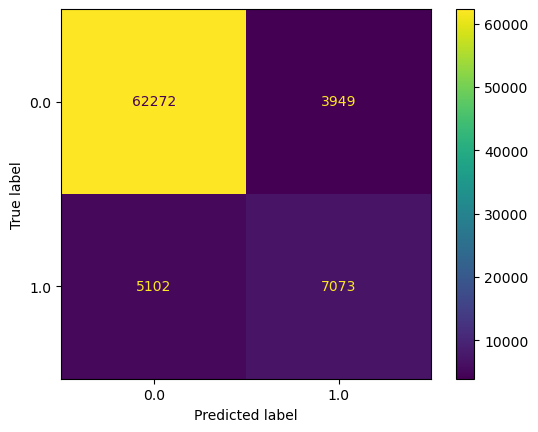

In [8]:
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [9]:
pred_prob[:,1]

array([0.00369958, 0.14924827, 0.00718828, ..., 0.0178856 , 0.00369958,
       0.19266088])

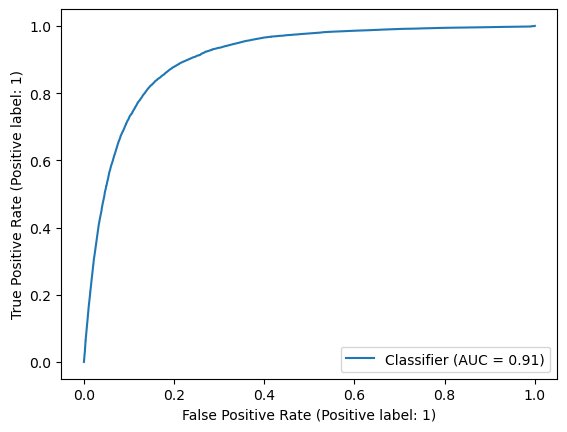

In [12]:
RocCurveDisplay.from_predictions(y_test, pred_prob[:,1])
plt.show()

In [13]:
thresh = []; sens = []; spec = []; s_s = []; f1 = []; acc = []

for i in range(1,100):
    thr = i/100
    cr = classification_report(y_test, (pred_prob[:,1]>thr).astype(int), output_dict=True, zero_division=0)
    thresh.append(thr)
    sens.append(cr['1.0']['recall'])
    spec.append(cr['0.0']['recall'])
    s_s.append(cr['1.0']['recall'] + cr['0.0']['recall'])
    f1.append(cr['1.0']['f1-score'])
    acc.append(cr['accuracy'])

thresh_df = pd.DataFrame({'Threshold': thresh, 'Sensitivity': sens, 'Specificity': spec,
                          'Sens_Spec_Sum': s_s, 'F1 Score': f1, 'Accuracy': acc})

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
thresh_df

,Threshold,Sensitivity,Specificity,Sens_Spec_Sum,F1 Score,Accuracy
0,0.01,0.990062,0.321892,1.311953,0.348714,0.425659
1,0.02,0.976591,0.509929,1.486520,0.420751,0.582402
2,0.03,0.964682,0.603374,1.568055,0.468068,0.659485
3,0.04,0.948255,0.660636,1.608891,0.499859,0.705304
4,0.05,0.934538,0.702073,1.636611,0.525761,0.738175
5,0.06,0.923368,0.729889,1.653257,0.544354,0.759937
6,0.07,0.908008,0.753658,1.661666,0.559138,0.777629
7,0.08,0.897741,0.772625,1.670366,0.572821,0.792056
8,0.09,0.890021,0.785476,1.675496,0.582315,0.801712
9,0.10,0.879671,0.798644,1.678315,0.591402,0.811228


In [16]:
thresh_df.idxmax()

Threshold        98
Sensitivity       0
Specificity      94
Sens_Spec_Sum    10
F1 Score         31
Accuracy         50
dtype: int64

<Axes: >

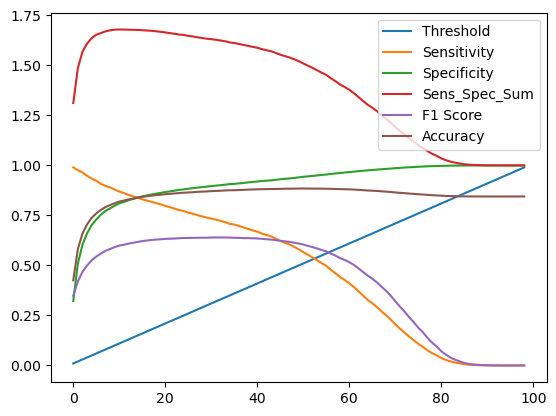

In [17]:
thresh_df.plot()

In [19]:
# Using a threshold of 0.10
print(classification_report(y_test, (pred_prob[:,1]>0.10), target_names=["Low risk", "High risk"], zero_division=0))

              precision    recall  f1-score   support

    Low risk       0.97      0.80      0.88     66221
   High risk       0.45      0.88      0.59     12175

    accuracy                           0.81     78396
   macro avg       0.71      0.84      0.73     78396
weighted avg       0.89      0.81      0.83     78396



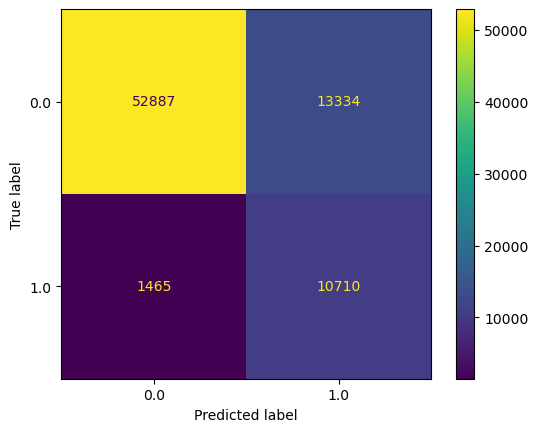

In [20]:
# Using a threshold of 0.10
cm = confusion_matrix(y_test, (pred_prob[:,1]>0.10), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()